# **Project Name**    -  SCMS delivery history analysis



##### **Project Type**    - EDA on Supply Chain Management Dataset
##### **Contribution**    - Individual

# **Project Summary -**


This dataset contains detailed information about shipment orders, shipment modes, weights, freight costs, managing teams, vendors, vendor INCO terms, scheduled delivery dates, delivered dates, and processing time information.

The initial step in data analysis begins with **data cleaning and preprocessing** to ensure consistency, accuracy, and usability of the dataset. The most critical steps include:

- Handling missing values  
- Converting date-time and numerical columns to appropriate data types  
- Creating derived features such as delivery status  
- Handling referenced values and outliers  

Outliers and referenced values can significantly distort visualizations and insights. For example:

- Null values are present in the **Shipment Mode** column  
- Referenced values are present in **Freight Cost** and **Weight** columns  

These values are referenced because freight cost and weight are calculated once per shipment rather than per line item.

---

## Exploratory Data Analysis (EDA)

EDA was performed to:

- Measure correlations between numerical variables  
- Identify cost-driving factors  
- Analyze delivery efficiency  
- Examine delivery timeliness patterns  

---

## Key Business Insights

### 1. Which numerical features depend heavily on each other?

The analysis revealed:

- **Weight, Line Item Value, and Insurance** are strongly correlated  
- Higher weight and higher item value lead to higher insurance costs  
- Freight cost has only a weak positive correlation with weight  

This indicates that additional factors beyond weight influence total freight cost.

---

### 2. Are shipments managed by specific teams more likely to be delivered on time?

- Most shipments are managed by the **PMO-US** team  
- On-time delivery rate: **88.5%**  
- Average delay: **-6.1 days**

A negative delay means shipments are delivered approximately **6 days earlier** than scheduled on average.

---

### 3. Does shipment mode influence meeting the scheduled delivery date?

Four shipment modes were analyzed (excluding null values).  

| Shipment Mode | On-time % | Average Delay |
|---------------|----------|--------------|
| Air           | 90%      | -3           |
| Air Charter   | 88%      | -19          |
| Truck         | 83%      | -9           |
| Ocean         | 82%      | 5            |

Key observations:

- **Air shipments** have the highest on-time rate (90%)
- **Air Charter** has the lowest average delay but higher freight cost
- **Ocean shipments** show the highest positive delay (late deliveries)

---

### 4. Do shipments from certain countries experience more delays?

Countries such as:

- Congo DRC  
- Kenya  

show greater delivery delays compared to others with significant shipment volume.  

However, countries with fewer orders may also show large delays due to limited sample size.

---

### 5. Does shipment mode impact the frequency of on-time deliveries?

- Overall on-time delivery rate: **88%**
- A small number of shipments experience severe delays (>90 days)
- Air shipments demonstrate the highest reliability in on-time performance

---

### 6. Does lead time (PO Sent → Scheduled Delivery) affect delivery performance?

Limitations:

- Many null values in **PO Sent to Vendor Date**
- Shipments originating from RDC do not follow standard PO flow

After excluding invalid entries and creating a **Lead Time** feature:

- Shorter lead times increase the risk of delivery delays  
- Adequate lead time improves the probability of on-time delivery  

---

### 7. Does INCO term impact vendor delivery performance?

Three major INCO terms were analyzed:

| INCO Term | On Time Rate | Average Delay |
|-----------|-------------|--------------|
| EXW       | 95%         | 0            |
| DDP       | 92%         | -12          |
| RDC       | 82%         | -8           |

Insights:

- **EXW** has the highest on-time rate  
- **DDP** shipments are frequently delivered early  
- **RDC** shipments show comparatively lower reliability  

---

### 8. Are higher weight shipments more likely to incur higher insurance costs?

Yes. There is a **strong positive correlation** between:

- Shipment weight  
- Line item insurance  

This relationship holds consistently across all shipment modes.

---

# Conclusion

The overall delivery performance is strong with an 88% on-time rate. Air shipments and EXW INCO terms show superior reliability, while shorter lead times and certain geographic regions contribute to increased delays. Cost drivers such as weight and item value significantly influence insurance expenses, but freight cost is impacted by multiple additional operational factors.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


On-time delivery and supply cost management are critical to the success of supply chain operations, particularly for emergency supplies and cost-sensitive delivery locations.

This project focuses on performing **Exploratory Data Analysis (EDA)** on a supply chain and delivery dataset to understand the key factors that influence:

- Delivery performance  
- Shipment costs  
- Overall operational efficiency  

The primary objective of this analysis is to derive meaningful and actionable insights that support data-driven decision-making. These insights aim to improve:

- Strategic planning  
- Cost efficiency  
- Delivery reliability  

Ultimately, the analysis helps stakeholders make calculated decisions to optimize supply chain performance and ensure dependable delivery outcomes.


#### **Define Your Business Objective?**

To reduce delivery delay and effective cost management

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [26]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [27]:
# Load Dataset
df = pd.read_csv('/Users/kushal/Desktop/python_programs/SCMS_Delivery_History_Dataset.csv')

### Dataset First View

In [28]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [29]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Dataset Rows & Columns count

In [30]:
# Dataset Rows & Columns count
print("Number of rows and columns in the dataset:", df.shape)

Number of rows and columns in the dataset: (10324, 33)


### Dataset Information

In [31]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [32]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [33]:
#define date columns
date_cols = [
    "PQ First Sent to Client Date",
    "PO Sent to Vendor Date",
    "Scheduled Delivery Date",
    "Delivered to Client Date",
    "Delivery Recorded Date"
]

In [34]:
#replace date not captured with nan
df[date_cols] = df[date_cols].replace("Date Not Captured", np.nan)

In [35]:
missing_summary = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={"index": "column", 0: "missing_pct"})
)

missing_summary


,column,missing_pct
0,Dosage,16.815188
1,Shipment Mode,3.487021
2,PO Sent to Vendor Date,3.177063
3,Line Item Insurance (USD),2.779930
4,PQ First Sent to Client Date,1.985664
5,First Line Designation,0.000000
6,Manufacturing Site,0.000000
7,Unit Price,0.000000
8,Pack Price,0.000000
9,Line Item Value,0.000000


In [36]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date     205
PO Sent to Vendor Date           328
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

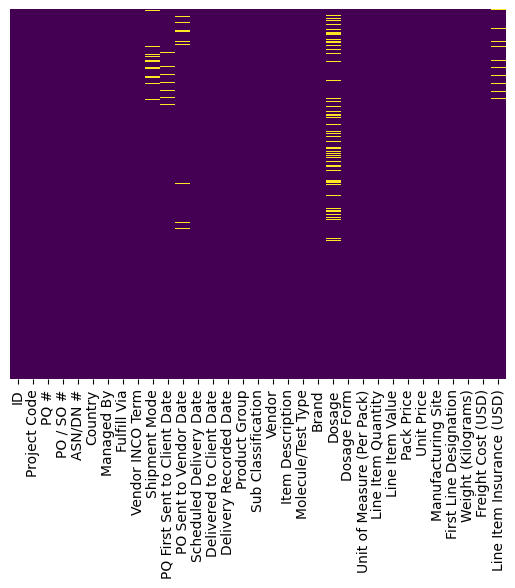

In [37]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

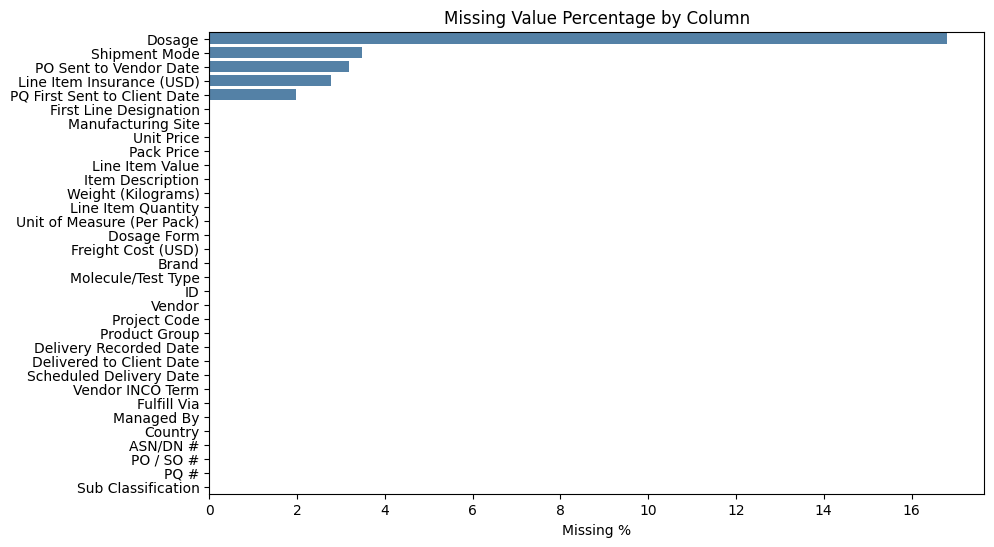

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing_summary,
    y="column",
    x="missing_pct",
    color="steelblue"
)
plt.title("Missing Value Percentage by Column")
plt.xlabel("Missing %")
plt.ylabel("")
plt.show()


### What did you know about your dataset?

The dataset captures operational, financial, logistical, and product-level details of supply chain shipments. It enables analysis of delivery performance, cost drivers, vendor efficiency, and transportation effectiveness.

## ***2. Understanding Your Variables***

In [39]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [40]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10324.0,NaN,NaN,NaN,51098.968229,31944.332496,1.0,12795.75,57540.5,83648.25,86823.0
Project Code,10324,142,116-ZA-T30,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PQ #,10324,1237,Pre-PQ Process,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO / SO #,10324,6233,SCMS-199289,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASN/DN #,10324,7030,ASN-19166,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10324,43,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Managed By,10324,4,PMO - US,10265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill Via,10324,2,From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor INCO Term,10324,8,N/A - From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipment Mode,9964,4,Air,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Variable Description – SCMS Delivery History Dataset

Below is a detailed description of each column in the dataset:

---

### Identification & Reference Columns

- **ID**  
  Unique identifier for each shipment line item record.

- **Project Code**  
  Code representing the specific project under which the shipment was made.

- **PQ # (Procurement Quote Number)**  
  Unique number assigned during the procurement quotation process.

- **PO / SO # (Purchase Order / Sales Order Number)**  
  Unique identifier for the purchase or sales order associated with the shipment.

- **ASN/DN # (Advanced Shipment Notice / Delivery Note Number)**  
  Reference number used for shipment tracking and delivery confirmation.

---

### Geographic & Management Information

- **Country**  
  Destination country where the shipment is delivered.

- **Managed By**  
  Team or department responsible for managing the shipment.

- **Fulfill Via**  
  Indicates the fulfillment channel (e.g., vendor direct shipment or regional distribution center).

- **Vendor INCO Term**  
  International Commercial Terms (e.g., EXW, DDP, RDC) defining responsibilities between buyer and seller.

- **Shipment Mode**  
  Mode of transportation used for delivery (Air, Ocean, Truck, etc.).

---

### Date & Timeline Columns

- **PQ First Sent to Client Date**  
  Date when the procurement quotation was first shared with the client.

- **PO Sent to Vendor Date**  
  Date when the purchase order was officially sent to the vendor.

- **Scheduled Delivery Date**  
  Planned delivery date agreed upon for shipment arrival.

- **Delivered to Client Date**  
  Actual date the shipment was delivered to the client.

- **Delivery Recorded Date**  
  Date when the delivery was officially recorded in the system.

---

### Product Information

- **Product Group**  
  Broad category of the product (e.g., pharmaceuticals, medical supplies).

- **Sub Classification**  
  More specific classification within the product group.

- **Vendor**  
  Name of the supplier providing the product.

- **Item Description**  
  Detailed description of the product being shipped.

- **Molecule / Test Type**  
  Active pharmaceutical ingredient (for medicines) or test type (for diagnostics).

- **Brand**  
  Brand name of the product.

- **Dosage**  
  Strength or concentration of the pharmaceutical product.

- **Dosage Form**  
  Physical form of the medication (tablet, capsule, liquid, etc.).

- **Unit of Measure (Per Pack)**  
  Measurement unit representing the quantity contained in one pack (e.g., 100 tablets per pack).

---

### Financial & Quantity Information

- **Line Item Quantity**  
  Total quantity of items ordered for that specific line entry.

- **Line Item Value**  
  Total monetary value of the line item (Quantity × Unit Price).

- **Pack Price**  
  Price of one pack of the product.

- **Unit Price**  
  Cost per individual unit within a pack.

- **Line Item Insurance (USD)**  
  Insurance cost associated with the shipment of that line item.

- **Freight Cost (USD)**  
  Transportation cost incurred for delivering the shipment.

---

### Operational Details

- **Manufacturing Site**  
  Location where the product was manufactured.

- **First Line Designation**  
  Indicates whether the product is categorized as first-line treatment in healthcare supply classification.

- **Weight (Kilograms)**  
  Total shipment weight (in kg) corresponding to the line item.

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      764
PO Sent to Vendor Date            896
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.
df.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)


In [43]:
df.drop(['Item Description','Molecule/Test Type'],axis=1,inplace=True)

In [44]:
df['Freight_Cost_USD'].value_counts()

Freight_Cost_USD
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

In [45]:
df['Weight (Kilograms)'].value_counts()

Weight (Kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: count, Length: 4688, dtype: int64

In [46]:
#index of rows where freight cost is included in commodity cost or invoiced separately or referenced
freight_cost_indexes_to_remove = df.index[(df['Freight_Cost_USD'] == 'Freight Included in Commodity Cost') | (df['Freight_Cost_USD'] == 'Invoiced Separately') | (df['Freight_Cost_USD'].str.contains('[a-zA-Z]'))].tolist()
len(freight_cost_indexes_to_remove)

4126

In [47]:
#drop rows where freight cost is included in commodity cost or invoiced separately
clean_freight_cost_df = df.drop(index=freight_cost_indexes_to_remove)

In [52]:
print("No. of unique shipments:",len(clean_freight_cost_df['ASN/DN #'].unique()))

No. of unique shipments: 6198


In [55]:
clean_freight_cost_df['Freight_Cost_USD'] = clean_freight_cost_df['Freight_Cost_USD'].astype(float)
clean_freight_cost_df['Freight_Cost_USD'].describe()


count      6198.000000
mean      11103.234819
std       15813.026692
min           0.750000
25%        2131.120000
50%        5869.655000
75%       14406.570000
max      289653.200000
Name: Freight_Cost_USD, dtype: float64

In [61]:
clean_freight_cost_df = clean_freight_cost_df[clean_freight_cost_df['Weight (Kilograms)'] != 'Weight Captured Separately']
clean_freight_cost_df['Weight (Kilograms)'] = pd.to_numeric(clean_freight_cost_df['Weight (Kilograms)'], errors='coerce')
weight_anamoly_removed = clean_freight_cost_df[clean_freight_cost_df['Weight (Kilograms)'] < clean_freight_cost_df['Weight (Kilograms)'].quantile(0.99)]
weight_by_mode = weight_anamoly_removed.groupby('Shipment Mode')['Weight (Kilograms)'].sum().reset_index()

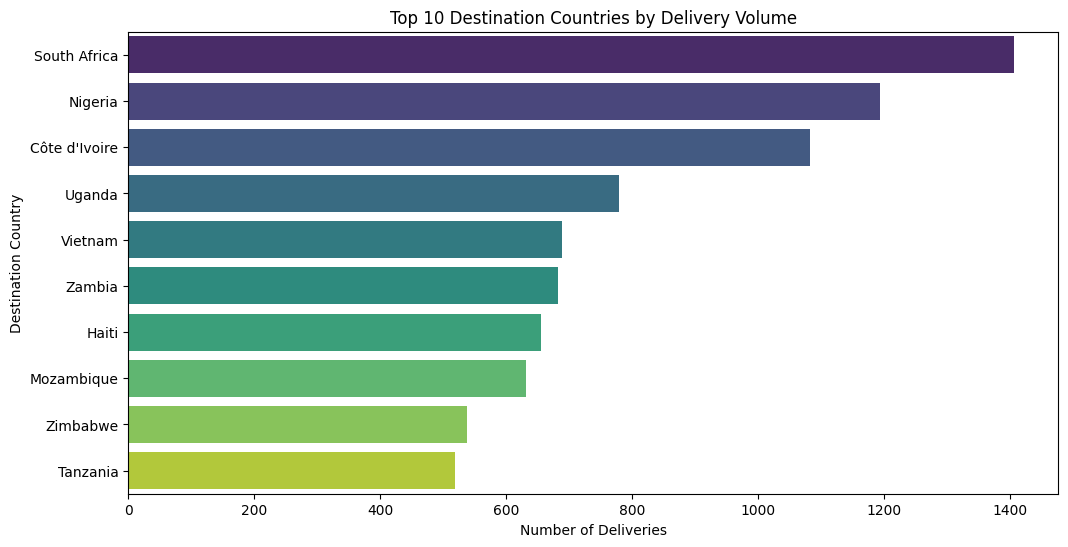

In [56]:
#sns plot for top 10 countries by delivery volume
top_countries = df['Country'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Country'].isin(top_countries)],
              y='Country',
              order=top_countries,
              palette='viridis')
plt.title("Top 10 Destination Countries by Delivery Volume")
plt.xlabel("Number of Deliveries")
plt.ylabel("Destination Country")
plt.show()

In [57]:
shipment_mode = df['Shipment Mode'].value_counts()
labels = np.array(shipment_mode.index)
sizes = np.array((shipment_mode/shipment_mode.sum())*100)
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.3)])
fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text='Shipment Mode Distribution by Volume')
fig.show()


In [62]:
#visualize weight by shipment mode using pie chart
labels = weight_by_mode['Shipment Mode']
sizes = weight_by_mode['Weight (Kilograms)']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.3)])
fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text='Weight Distribution by Shipment Mode')
fig.show()


In [67]:
# Get unique shipment modes
shipment_modes = weight_by_mode['Shipment Mode'].unique()

# Create 2x2 subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f'Shipment Mode: {mode}' for mode in shipment_modes],
    x_title='Weight (Kilograms)',
    y_title='Freight Cost (USD)'
)

# Add scatter plots to subplots
for idx, mode in enumerate(shipment_modes):
    # Calculate row and column (2x2 grid)
    row = (idx // 2) + 1
    col = (idx % 2) + 1
    
    # Filter data for current mode
    mode_data = weight_anamoly_removed[weight_anamoly_removed['Shipment Mode'] == mode]
    
    # Add scatter trace
    fig.add_trace(
        go.Scatter(x=mode_data['Weight (Kilograms)'],y=mode_data['Freight_Cost_USD'], mode='markers', name=mode, showlegend=False),
        row=row, col=col
    )
    
    z = np.polyfit(mode_data['Weight (Kilograms)'], mode_data['Freight_Cost_USD'], 1)
    p = np.poly1d(z)
    
    # Add trendline
    x_range = np.linspace(mode_data['Weight (Kilograms)'].min(), 
                            mode_data['Weight (Kilograms)'].max(), 100)
    
    fig.add_trace(
        go.Scatter(x=x_range, y=p(x_range), mode='lines', name=f'{mode} trend', line=dict(color='red', dash='dash'), showlegend=False),
        row=row, col=col
    )

# Update layout
fig.update_layout( title_text='Weight vs Freight Cost by Shipment Mode', height=800, width=1000, template='plotly_white', showlegend=False )

# Update axis labels
fig.update_xaxes(title_text='Weight (Kilograms)', row=2, col=1)
fig.update_xaxes(title_text='Weight (Kilograms)', row=2, col=2)
fig.update_yaxes(title_text='Freight Cost (USD)', row=1, col=1)
fig.update_yaxes(title_text='Freight Cost (USD)', row=2, col=1)

fig.show()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

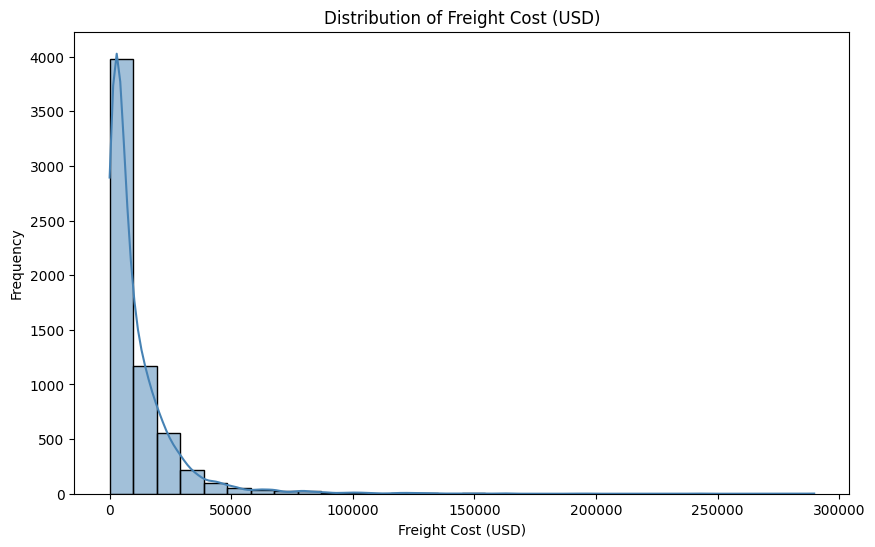

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(clean_freight_cost_df['Freight_Cost_USD'].astype(float), bins=30, kde=True, color='steelblue')
plt.title("Distribution of Freight Cost (USD)")
plt.xlabel("Freight Cost (USD)")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

visualize freight cost distribution


##### 2. What is/are the insight(s) found from the chart?

we observe the freight cost distribution to be right skewed with a majority of shipments having lower freight costs and a few shipments having significantly higher costs

##### 3. Will the gained insights help creating a positive business impact?
This might be happening because while most shipments are low-risk or low-value, there are occasional high-value shipments that require substantial freight coverage and handling the high freight cost orders impacts effective cost management

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
- Use air and air charter shipment modes to deliver only low weight and time critical supplies
- Use ocean shipments to deliver non-time critical supplies
- Keep more lead time to deliver to remote areas to ensure on-time deliveries
- Optimise lead time to deliver supplies to all the other areas
- Avoid air charter shipments to decrease insurance costs
- Supply deliveries from Regional Distribution Centers


Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***